<a href="https://colab.research.google.com/github/waltersalles/QuarentenaDadosAlura/blob/master/Desafio2alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "genero"]
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas_medias_por_filmes = avaliacoes.groupby("filmeId")["nota"].mean()
filmes_com_media = filmes.join(notas_medias_por_filmes, on="filmeId")
filmes_com_media = filmes_com_media.rename(columns={"nota":"nota_media"}).round(2)
filmes_com_media

,filmeId,titulo,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


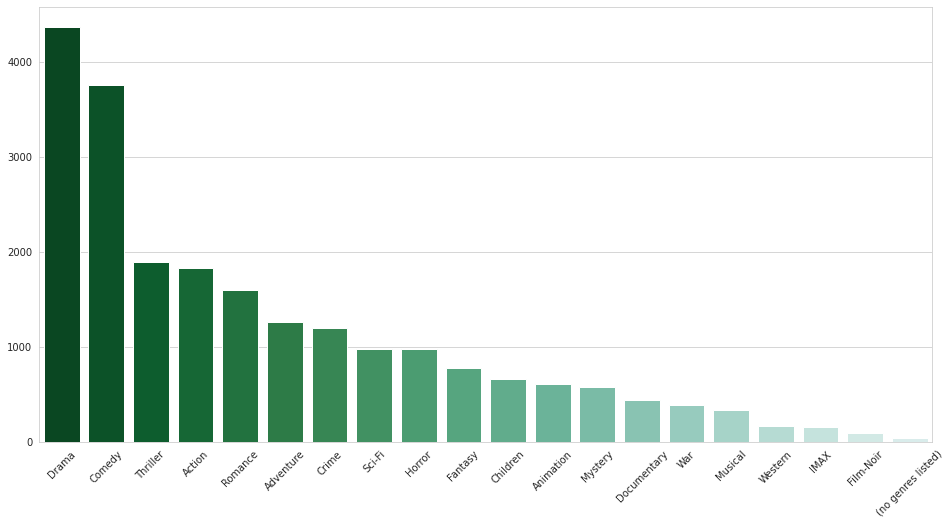

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.xticks(rotation=45)
plt.show()

In [6]:
filmes_com_media.head(100)

,filmeId,titulo,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
95,107,Muppet Treasure Island (1996),Adventure|Children|Comedy|Musical,3.33
96,108,Catwalk (1996),Documentary,4.00
97,110,Braveheart (1995),Action|Drama|War,4.03
98,111,Taxi Driver (1976),Crime|Drama|Thriller,4.11


In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()


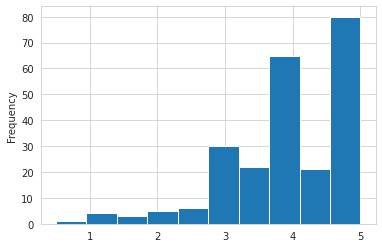

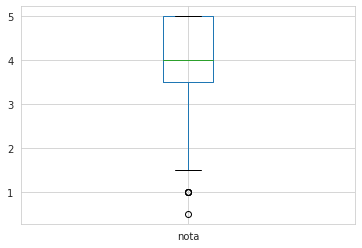

count    237.000000
mean       4.031646
std        0.967726
min        0.500000
25%        3.500000
50%        4.000000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [8]:
plot_filme(110)


In [10]:
notas_por_filme = avaliacoes.groupby("filmeId")["nota"].count()
filmes_com_media["total_votos"] = notas_por_filme
filmes_com_media.sort_values("total_votos", ascending=False).head(10)

,filmeId,titulo,genero,nota_media,total_votos
356,412,"Age of Innocence, The (1993)",Drama,3.50,329.0
318,360,I Love Trouble (1994),Action|Comedy,2.69,317.0
296,338,Virtuosity (1995),Action|Sci-Fi|Thriller,2.84,307.0
593,735,Cemetery Man (Dellamorte Dellamore) (1994),Horror,3.93,279.0
2571,3439,Teenage Mutant Ninja Turtles II: The Secret of...,Action|Children|Fantasy,2.69,278.0
260,300,Quiz Show (1994),Drama,3.52,251.0
480,548,Terminal Velocity (1994),Action|Mystery|Thriller,2.75,238.0
110,128,Jupiter's Wife (1994),Documentary,3.00,237.0
589,726,Last Dance (1996),Drama,3.00,224.0
527,616,"Aristocats, The (1970)",Animation|Children,3.41,220.0


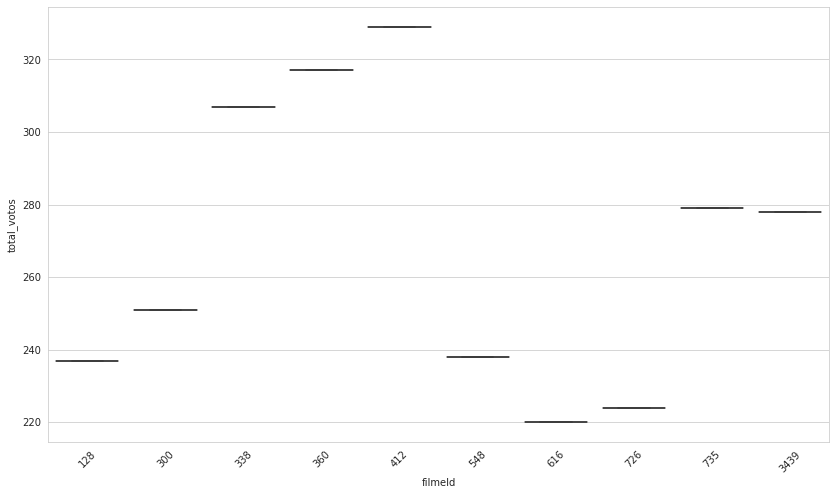

In [11]:
sns.set_style("whitegrid")
plt.subplots(figsize=(14, 8))
sns.boxplot(data = filmes_com_media.query(
    "filmeId in [412,360,338,735,3439,300,548,128,726,616]"), 
            x ="filmeId", y="total_votos")
plt.xticks(rotation=45)
plt.show()

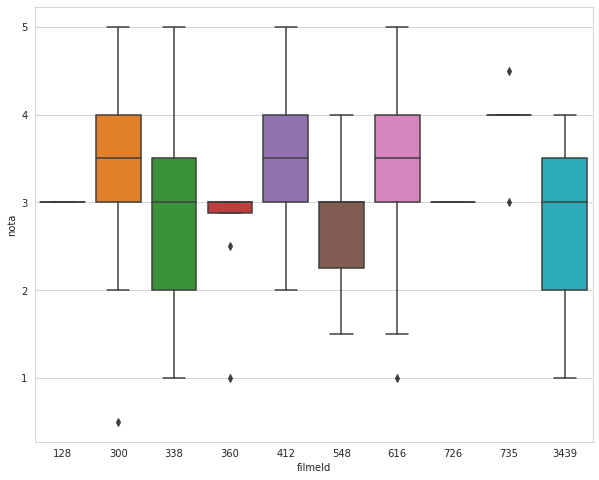

In [12]:
%matplotlib inline
plt.subplots(figsize=(10, 8))
sns.boxplot(data = avaliacoes.query("filmeId in [412,360,338,735,3439,300,548,128,726,616]"),
            x ="filmeId", y="nota")
plt.show()

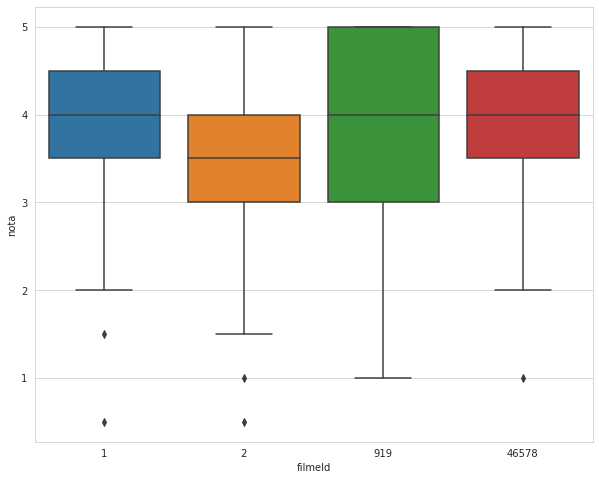

In [13]:
plt.subplots(figsize=(10, 8))
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota" )
#plt.xticks(avaliacoes["titulo"], rotation=45)

In [14]:
notas_medias_por_filmes = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medianas_por_filmes = avaliacoes.groupby("filmeId")["nota"].median()
print(notas_medias_por_filmes)
print(notas_medianas_por_filmes)

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64
filmeId
1         4.0
2         3.5
3         3.0
4         3.0
5         3.0
         ... 
193581    4.0
193583    3.5
193585    3.5
193587    3.5
193609    4.0
Name: nota, Length: 9724, dtype: float64


In [15]:
moda_filme = avaliacoes.groupby(by="filmeId")["nota"].agg(lambda x:x.value_counts().index[0])
print(moda_filme)

filmeId
1         4.0
2         4.0
3         3.0
4         3.0
5         3.0
         ... 
193581    4.0
193583    3.5
193585    3.5
193587    3.5
193609    4.0
Name: nota, Length: 9724, dtype: float64


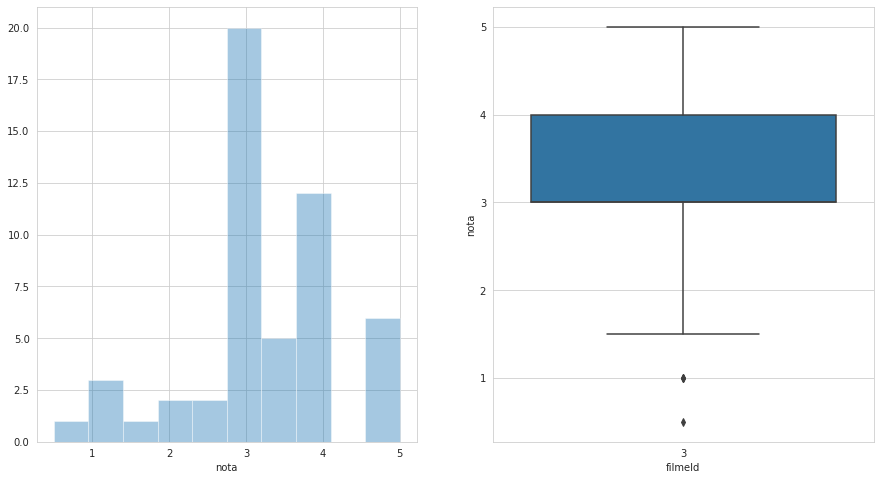

count    52.000000
mean      3.259615
std       1.054823
min       0.500000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: nota, dtype: float64

In [18]:
def plot_box_hist(n):
  f, axes = plt.subplots(1, 2, figsize = (15,8))
  notas_do_filme = avaliacoes.query(f"filmeId == {n}")["nota"]
  sns.distplot(notas_do_filme, bins = 10, ax = axes[0], kde= False)
  g = sns.boxplot(data = avaliacoes.query(f"filmeId == {n}"), x = "filmeId",y = "nota", 
                  ax = axes[1])
  plt.show()
  return notas_do_filme.describe()

plot_box_hist(3)

In [0]:
titulos = filmes["titulo"]
anos = []
filme_ano = []
for titulo in titulos:
      ano = titulo[titulo.rfind("(")+1 : titulo.rfind(")")]
      if(ano.isdigit()):
        filme_ano.append({"year": ano, "title": titulo})
        if(ano not in anos):
          anos.append(ano)
filme_ano = pd.DataFrame(data=filme_ano)
filmes_com_ano = pd.merge(filmes, filme_ano, left_on="titulo", right_on="title")

In [21]:
filmes_com_ano.head()

,filmeId,titulo,genero,year,title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story (1995)
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,Jumanji (1995)
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II (1995)


In [0]:
filme_com_ano_notas = avaliacoes.join(filmes_com_ano, on="filmeId", lsuffix="_avaliaçôes", rsuffix="_ano")

In [23]:
media_nota_ano_filme = filme_com_ano_notas.groupby("year")["nota"].mean()
media_nota_ano_filme.head()

year
1902    1.500000
1903    4.000000
1916    3.727273
1917    2.250000
1919    2.666667
Name: nota, dtype: float64

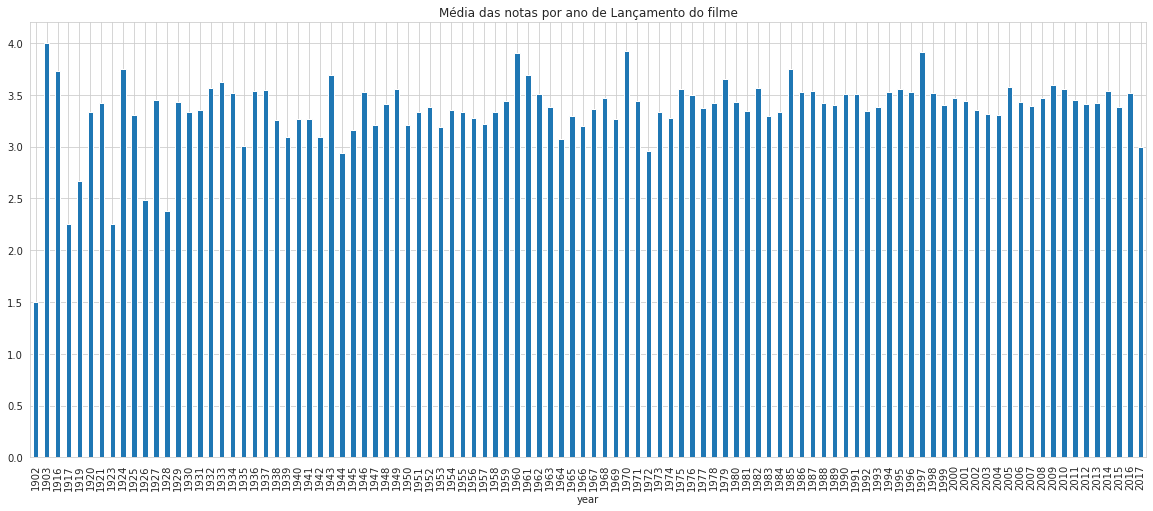

In [24]:
plt.figure(figsize=(20,8))
plt.title("Média das notas por ano de Lançamento do filme")
media_nota_ano_filme.plot.bar()
plt.xticks(rotation=90)
plt.show()